# 자연어 처리

In [108]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns 

## 1. 토크나이징

In [109]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()
pprint(kkma.sentences(u'네, 안녕하세요. 반갑습니다.'))

['네, 안녕하세요.', '반갑습니다.']


In [110]:
from konlpy.tag import Okt

okt = Okt()

text = "분명 배달이 완료되었는데 나는 받지 않았어"
result = okt.nouns(text)

print(result)


['분명', '배달', '완료', '나']


In [111]:
text1 = "나는 밥을 먹었엌ㅋㅋㅋ."
text2 = "나는 밥을 먹는다."

result1 = okt.pos(text1)
result2 = okt.pos(text1, norm = True)
result3 = okt.pos(text2, stem = True)
result4 = okt.pos(text1, norm = True, stem = True)

print(result1)
print(result2)
print(result3)
print(result4)

[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었엌', 'Noun'), ('ㅋㅋㅋ', 'KoreanParticle'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹었어', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb'), ('.', 'Punctuation')]
[('나', 'Noun'), ('는', 'Josa'), ('밥', 'Noun'), ('을', 'Josa'), ('먹다', 'Verb'), ('ㅋㅋㅋ', 'KoreanParticle'), ('.', 'Punctuation')]


In [112]:
baeMin_data = pd.read_csv("data/배달의민족댓글.csv")
print(baeMin_data.info())
print(baeMin_data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  463 non-null    int64 
 1   댓글          460 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.4+ KB
None
   Unnamed: 0                                                 댓글
0           0                                                NaN
1           1                                                NaN
2           2                                                NaN
3           3  80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4           4  음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
5           5  왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
6           6  배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...
7           7  장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
8           8  B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
9           9  수저포크x 버튼 기본으로 활성

In [113]:
print(baeMin_data.isna())
print(baeMin_data.isna().sum())

     Unnamed: 0     댓글
0         False   True
1         False   True
2         False   True
3         False  False
4         False  False
..          ...    ...
458       False  False
459       False  False
460       False  False
461       False  False
462       False  False

[463 rows x 2 columns]
Unnamed: 0    0
댓글            3
dtype: int64


In [114]:
baeMin_data.dropna(axis = 0, how = 'any', inplace = True)

print(baeMin_data.isna())
print(baeMin_data.isna().sum())

     Unnamed: 0     댓글
3         False  False
4         False  False
5         False  False
6         False  False
7         False  False
..          ...    ...
458       False  False
459       False  False
460       False  False
461       False  False
462       False  False

[460 rows x 2 columns]
Unnamed: 0    0
댓글            0
dtype: int64


In [115]:
print(baeMin_data.head(10))

    Unnamed: 0                                                 댓글
3            3  80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
4            4  음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
5            5  왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
6            6  배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는...
7            7  장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...
8            8  B마트 이용중인데 언제부턴가 전체선택 버튼이 비활성화되어있습니다. 장바구니에 있는것...
9            9  수저포크x 버튼 기본으로 활성화 되어있는거 환경 보호한다고 해놓은거 압니다. 그런데...
10          10  개선이되고 업데이트가 된다는건 불편했던 사항들을 반영하는것 아닌가요? 오히려 더 불...
11          11  사용자만 볼 수있는 배달시켰던 가게들에 대한 메모기능?이랑 언제 몇번 먹었다 같은걸...
12          12  저는 알뜰이나 한집배달이용을 원치않는데 가게검색시에는 가게배달은 선택할수가없네요. ...


In [116]:
# 첫 번째 댓글 가져오기

text1 = str(baeMin_data.iloc[0]['댓글'])
print(text1)
result1 = okt.pos(text1)
print(result1)

80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못했다고만 로딩반복. 로딩 이미지는 깨져서 나오고 안정적인 네트워크 상황 하에서 새로고침을 눌러도 무한로딩이고 심지어 지금 진행중인 주문내역 정보조차 정확하지 않음. 코로나 때문에 서버가 불안정한건지 뭔지는 모르겠으나 결국엔 취소 못하고 꼼짝없이 기다려 먹게됐네요.
[('80분', 'Number'), ('걸린다길래', 'Verb'), ('주문', 'Noun'), ('취소', 'Noun'), ('하려고', 'Verb'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('에', 'Josa'), ('들어가면', 'Verb'), ('계속', 'Noun'), ('최신', 'Noun'), ('정보', 'Noun'), ('를', 'Josa'), ('불러오지', 'Verb'), ('못', 'VerbPrefix'), ('했다고만', 'Verb'), ('로딩', 'Noun'), ('반복', 'Noun'), ('.', 'Punctuation'), ('로딩', 'Noun'), ('이미지', 'Noun'), ('는', 'Josa'), ('깨져서', 'Verb'), ('나오고', 'Verb'), ('안정', 'Noun'), ('적', 'Suffix'), ('인', 'Josa'), ('네트워크', 'Noun'), ('상황', 'Noun'), ('하', 'Noun'), ('에서', 'Josa'), ('새로고침', 'Noun'), ('을', 'Josa'), ('눌러도', 'Verb'), ('무한', 'Noun'), ('로딩', 'Noun'), ('이고', 'Josa'), ('심지어', 'Noun'), ('지금', 'Noun'), ('진행중', 'Noun'), ('인', 'Josa'), ('주', 'Modifier'), ('문', 'Modifier'), ('내', 'Modifier'), ('역', 'Noun'), ('정보', 'N

In [117]:
# 처음부터 다섯개의 댓글 가져오기

for comment in baeMin_data.iloc[:5]['댓글'] :
    sum_result = []
    comment_result = okt.pos(comment)
    for word, pos in comment_result :
        if (pos == 'Noun') :
            sum_result.append(word)
    print(sum_result)

['주문', '취소', '역', '계속', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '하', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '역', '정보', '코로나', '때문', '서버', '뭔', '취소', '못', '꼼짝']
['음식', '하나', '우리나라', '앱', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '시', '또', '다른', '은행', '앱', '인증', '번', '정도', '더', '함', '해외', '카드', '결제', '수단', '아예', '왜', '현금', '결제', '옵션', '음식', '하나', '나라', '우리나라', '밖', '강국', '무슨', '왜', '핸드폰', '번호', '인증', '카드', '인증', '등', '스탭', '앱', '사용', '쪽', '저녁', '먹음', '외국', '거주', '방법', '왜', '해외', '카드', '결제']
['왜', '업데이트', '때', '사용', '점점', '클릭', '한번', '더', '고', '더', '결제', '임', '저쪽', '구석', '마치', '집', '배달', '유도', '듯', '메인', '잘못', '클릭', '자꾸', '결제', '다시', '클릭', '젠', '결제', '창', '요청', '사항', '리뷰', '이벤트', '때', '또', '클릭', '짓', '정말', '배민']
['배달', '민족', '앱', '자체', '식사', '후', '맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '점', '문건', '수', '주문', '입장', '맛', '식당', '체적', '점', '맛집', '탐색', '점', '앱', '자체', '대한', '평점', '점', '식사', '항상', '추구', '평점', '속', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '

In [118]:
text = "오늘!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ㅇㅇ너무 hello HELLO 010-6695-2653  기분 좋아^^ ㅎㅇㅎㅇ"

import re
# new_text = re.sub("[^0-9]", "", text)
new_text = re.sub("[^0-9a-zA-Z가-힣!-=\s+-]", "", text)
print(new_text)

오늘!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 너무 hello HELLO 010-6695-2653  기분 좋아 


<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\2795881831.py:5: DeprecationWarning: invalid escape sequence '\s'
  new_text = re.sub("[^0-9a-zA-Z가-힣!-=\s+-]", "", text)


In [119]:
# 워드 클라우드
# 데이터의 모든 댓글에 대한 Noun 품사를 가진 단어들을 word_list 에 담는 것
# 조건1 : 전처리 과정(특수문자, 자음, 모음 없애기)
# 조건2 : 불용어 제거 (stopwords)

# 최종 출력 list
word_list = []

# 불용어
stopwords = ["배민", "민족", "배달", "배달의민족"]

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)
    review_list = okt.nouns(review)
    
    for rev in review_list :
        if (len(rev) != 1) & (rev not in stopwords) :
            word_list.append(rev)

print(word_list)
    

<>:13: DeprecationWarning: invalid escape sequence '\s'
<>:13: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\3301387190.py:13: DeprecationWarning: invalid escape sequence '\s'
  review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)


['로딩', '이미지', '안정', '네트워크', '상황', '새로고침', '무한', '로딩', '심지어', '지금', '진행중', '주문', '역정보', '코로나', '때문', '서버', '취소', '꼼짝', '음식', '우리나라', '국내', '번호', '번호', '인증', '필수', '카드', '결제', '선택', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '아예', '현금', '결제', '옵션', '음식', '우리나라', '강국', '무슨', '핸드폰', '번호', '인증', '카드', '인증', '등불', '게스', '사용', '저녁', '먹음', '외국', '거주', '방법', '해외', '카드', '결제', '업데이트', '사용', '점점', '클릭', '한번', '고더', '결제', '기본', '저쪽', '구석', '고마치', '유도', '메인', '잘못', '클릭', '자꾸나', '일반', '결제', '다시', '클릭', '결제', '요청', '사항', '리뷰', '이벤트', '때또', '클릭', '정말', '자체', '식사', '후맛', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '문건', '주문', '입장', '식당', '도대체', '맛집', '탐색', '자체', '대한', '평점', '식사', '항상', '추구', '평점', '해이', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법', '구안', '장바구니', '마트', '여러가지', '고스', '크롤', '살짝', '대각선', '포장', '용량', '좌우', '고비', '마트', '항목', '다시', '체크', '상태', '로딩', '위로', '전체', '선택', '살짝', '직선', '옆항목', '포장', '마트', '용량', '등항목', '선택', '해도', '필요', '거의', '일배', '민어', '플사', '마트', '이용', '언제', '가전체', '선택', '버튼

In [120]:
import collections

In [121]:
count_words = collections.Counter(word_list)

print(count_words)
print(count_words.most_common(30))

Counter({'주문': 202, '가게': 155, '메뉴': 139, '기능': 108, '리뷰': 101, '시간': 98, '고객': 95, '결제': 92, '음식': 84, '어플': 81, '검색': 76, '취소': 75, '업데이트': 67, '사용': 65, '센터': 64, '전화': 60, '쿠폰': 56, '연결': 55, '문제': 52, '선택': 48, '계속': 48, '생각': 47, '진짜': 46, '확인': 45, '추가': 43, '상담': 42, '요청': 40, '개선': 39, '설정': 38, '매장': 38, '사항': 36, '식당': 36, '사람': 35, '경우': 34, '삭제': 33, '기본': 32, '포장': 32, '화면': 32, '서비스': 32, '한번': 30, '라이더': 30, '사진': 30, '그냥': 29, '이용': 28, '버튼': 28, '처음': 28, '정말': 27, '사용자': 27, '채팅': 27, '직접': 27, '배차': 27, '시스템': 27, '음식점': 27, '연락': 27, '다시': 26, '알뜰': 26, '다른': 26, '할인': 26, '기사': 25, '목록': 25, '자체': 24, '위치': 24, '잘못': 23, '하나': 23, '부분': 23, '혜택': 23, '때문': 22, '정도': 22, '해도': 22, '광고': 22, '지도': 22, '문의': 21, '보고': 21, '주소': 21, '입력': 21, '항상': 20, '장바구니': 20, '전체': 20, '이번': 20, '이안': 20, '도안': 20, '별로': 20, '카드': 19, '점점': 19, '마트': 19, '보기': 19, '답변': 19, '가요': 19, '사장': 19, '찾기': 19, '이벤트': 18, '자주': 18, '최악': 18, '지연': 18, '로그인': 18, '오류': 18, '방법': 17, '크롤':

In [122]:
from matplotlib import font_manager

search_pont = "gothic"

for font in font_manager.findSystemFonts() :
    font_info = font_manager.FontProperties(fname = font)
    font_name = font_info.get_name()
    font_path = font_info.get_file()
    if search_pont in font_name.lower() :
        print(font_name, font_path)

NanumGothic C:\Windows\Fonts\BOLD.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Book C:\Windows\Fonts\FRABK.TTF
HYGothic-Extra C:\Windows\Fonts\H2GTRE.TTF
Franklin Gothic Medium Cond C:\Windows\Fonts\FRAMDCN.TTF
HYGothic-Medium C:\Windows\Fonts\H2GTRM.TTF
Yu Gothic C:\Windows\Fonts\YuGothR.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Century Gothic C:\Windows\Fonts\GOTHICBI.TTF
Franklin Gothic Demi C:\Windows\Fonts\FRADM.TTF
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Franklin Gothic Demi C:\Windows\Fonts\FRADMIT.TTF
Copperplate Gothic Light C:\Windows\Fonts\COPRGTL.TTF
Franklin Gothic Heavy C:\Windows\Fonts\FRAHVIT.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Franklin Gothic Medium C:\Windows\Fonts\framd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Franklin Gothic Heavy C:\Windows\Fonts\FRAHV.TTF
Malgun Gothic C:\Windows\Fonts\malgun.ttf
NanumGothic C:\Windows\Fonts\EXTRABOL

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import koreanize_matplotlib

from PIL import Image

<>:4: DeprecationWarning: invalid escape sequence '\W'
<>:4: DeprecationWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\1414811025.py:4: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\malgunbd.ttf",
c:\WorkSpace\myproject\.venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


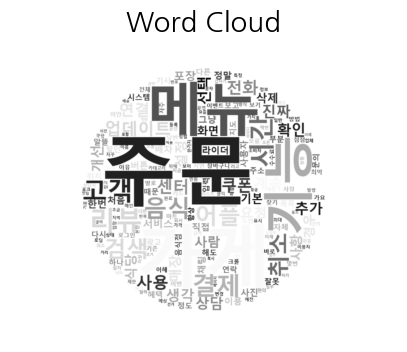

In [124]:
mask_img = np.array(Image.open("pictures/circle.png"))

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_gray',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_words)

plt.figure(figsize = (5, 5))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize = 20)
plt.show()

<>:10: DeprecationWarning: invalid escape sequence '\s'
<>:28: DeprecationWarning: invalid escape sequence '\W'
<>:10: DeprecationWarning: invalid escape sequence '\s'
<>:28: DeprecationWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\635852719.py:10: DeprecationWarning: invalid escape sequence '\s'
  review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)
C:\Users\user\AppData\Local\Temp\ipykernel_26396\635852719.py:28: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\malgunbd.ttf",


['깨다', '나오다', '누르다', '않다', '건지다', '모르다', '기다리다', '먹다', '돼다', '시키다', '깔다', '시키다', '먹다', '시키다', '하다', '하다', '바뀌다', '바뀌다', '밀리다', '들다', '놓다', '가다', '하다', '들다', '하다', '하다', '바뀌다', '자다', '이뤄지다', '넘다', '남기다', '하다', '해내다', '바라다', '줄이다', '올리다', '내리다', '움직이다', '넘어가다', '버리다', '넘어오다', '두다', '되어다', '올라가다', '되다', '벗어나다', '늘다', '쓸다', '누르다', '되다', '넘다', '하다', '느끼다', '되어다', '하다', '내다', '누르다', '떼다', '되다', '되다', '넘어가다', '보다', '되어다', '놓다', '바꾸다', '해주다', '열다', '되어다', '까먹다', '하다', '바꾸다', '해주다', '먹다', '받다', '보다', '먹다', '가져오다', '만들다', '되다', '되다', '보이다', '보이다', '하다', '찾다', '찾다', '나오다', '보다', '시키다', '먹다', '보다', '시키다', '먹다', '하다', '이다', '시키다', '먹다', '이다', '잘알다', '하다', '가다', '하다', '지다', '싸다', '식다', '오다', '집다', '차다', '해주다', '하다', '하다', '하다', '하다', '늦다', '늦다', '하다', '모르다', '이다', '하다', '잡히다', '해주다', '해주다', '하다', '적다', '나다', '들다', '들다', '되다', '건지다', '없어지다', '써다', '오다', '하다', '겠다', '하다', '들다', '찌다', '놓다', '많아지다', '보다', '사라지다', '생기다', '걸다', '하다', '들다', '하다', '되어다', '받다', '걸다', '보다', '하다', '되다', '받다', '않다', '기다리다', '서다

c:\WorkSpace\myproject\.venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


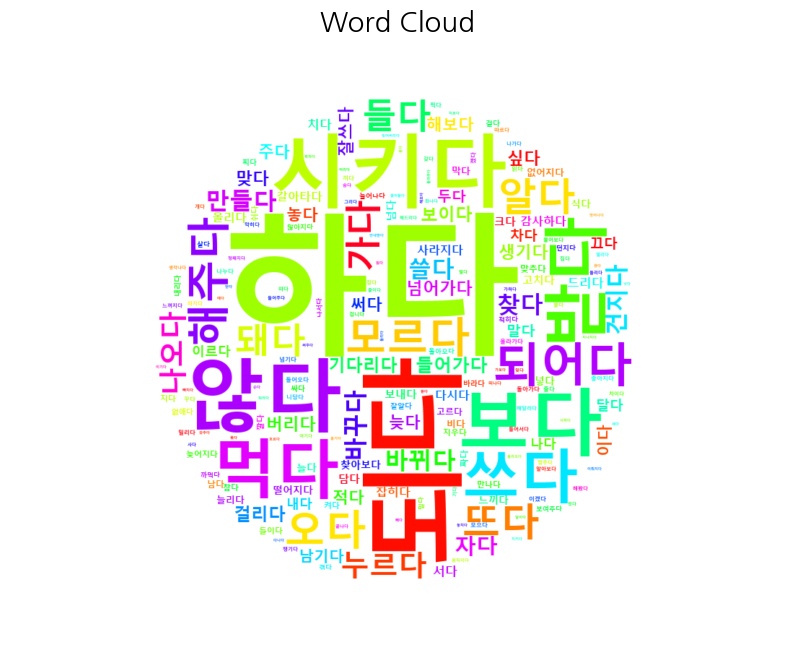

In [125]:
# 배달의 민족 댓글 "동사" 에 대한 워드 클라우드
# norm, stem
# 조건은 동일
# gpt 이용해서 새로운 마스크 만들어보고 적용해보기

# 최종 출력 list
verb_list = []

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[ㄱ-ㅎㅏ-ㅣ\s!@#$%^&*()]", "", review)
    review_list = okt.pos(review, stem = True)
    
    for rev, pos in review_list :
        if (len(rev) != 1) & (pos == 'Verb'):
            verb_list.append(rev)

print(verb_list)

# counter
count_verbs = collections.Counter(verb_list)

print(count_verbs)
print(count_verbs.most_common(30))

# WC

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_rainbow_r',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_verbs)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize = 20)
plt.show()
    

## 5) 검색

In [126]:
# 명사들을 추출한 워드클라우드를 생성했다면, 그 명사가 포함된 문장을 어떻게 검색할 수 있을까?
# '취소' 단어가 있는 문장들만 검색

baeMin_data.loc[baeMin_data['댓글'].str.contains("취소"), : ]

,Unnamed: 0,댓글
3,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
17,17,편의점 꺼 30분을 기다렸는데 갑자기 기타 사유로 주문이 취소가 됐어요. 평소에 워...
30,30,응대수준 심각하네요. 문의량이 많다는 이유로 접수도 못하게하나? 예정시간에 도착을 ...
35,35,최악의 어플. 배민원 배달지연 너무되서 취소하려고 하는데 취소는 고객센터 연결이 필...
36,36,최근 배달이 안 되는 일이 발생하는게 너무 스트레스가 크네요... 배민 원에서 시키...
44,44,배민원에서 주문하고 배차가 한시간 넘게 걸린데서 취소요청하니 가게에 먼저 요청하고 ...
46,46,아니. 배달라이더가 안잡히면 가게 사장님들이 취소할 수 있도록 해놓던지. 배달 라이...
52,52,배달원 부족하면 애초에 주문이 어렵다 문구를 해놔야하는거 아니냐 뭔 옆동네에서 조리...
55,55,배빈1으로 1시간 넘게 음식을 못받았습니다. 고객센터도 연락 잘 안되고 잘 안되는 ...
71,71,상담사 연결 진짜 안되구요 유선연결은 고사하고 채팅상담도 안됩니다. 배달음식 시킨데...


In [127]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

text = "분명 배달이 완료되었는데 나는 받지 않았어"

for res, score in kiwi.analyze(text, top_n=5) :
    print(score, review_list, sep="\t")

-65.28563690185547	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-69.0050277709961	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-69.7073745727539	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-73.4267578125	[('메뉴', 'Noun'), ('잘못', 'Noun'), ('와', 'Josa'), ('서문', 'Noun'), ('의하다', 'Adjective'), ('채팅', 'Noun'), ('답변', 'Noun'), ('하다', 'Verb'), ('20분', 'Number'), ('걸림메뉴다시받는데', 'Foreign'), ('1시간', 'Number'), ('걸림이거리뷰쓰고어플삭제', 'Foreign')]
-73.45321655273438	[('

In [128]:
result = kiwi.tokenize(text)

for res in result :
    print(res.form)

분명
배달
이
완료
되
었
는데
나
는
받
지
않
었
어


In [129]:
# 명사만 추출

for res in result :
    if res.tag[0] == "N" :
        print(res.form, res.tag)

배달 NNG
완료 NNG
나 NP


In [130]:
data2 = pd.read_csv("data/배달의민족댓글2.csv")
data2.head()

,Unnamed: 0,댓글
0,3,80분 걸린다길래 주문취소 하려고 주문내역에 들어가면 계속 최신 정보를 불러오지 못...
1,4,음식 하나 시키는데 우리나라 앱들은 1) 국내 번호 필요함. 번호 인증 필수 2) ...
2,5,왜이렇게 업데이트 할때마다 사용하기 점점 불편하게 바뀌는지? 클릭한번 더 해야되고 ...
3,6,"배달의 민족앱자체는 만족하나, 식사후 맛 리뷰 평점 자체는 클린하게 이뤄지진 못하는..."
4,7,장바구니가 너무 불편합니다. 비마트에서 여러가지를 담고 스크롤 올리고 내릴때 살짝 ...


In [131]:
# 빈 리스트 만들기 main_list
# 댓글을 반복문으로 하나씩 추출
# 전처리 과정 그대로
# 댓글 형태소 분석
# 빈 리스트 만들기 sub_list
# sub_list 에 명사 단어들 담기
# main_list 에 sub_list 담기

main_list = []

for review in baeMin_data['댓글'].tolist() :
    review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    result = kiwi.tokenize(review)
    sub_list = []

    for res in result :
        if (res.tag[0] == 'N') & (len(res.form) > 1) :
            sub_list.append(res.form)
    
    main_list.append(sub_list)

print(main_list)

<>:12: DeprecationWarning: invalid escape sequence '\s'
<>:12: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\3242657347.py:12: DeprecationWarning: invalid escape sequence '\s'
  review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)


[['주문', '취소', '주문', '내역', '최신', '정보', '로딩', '반복', '로딩', '이미지', '안정', '네트워크', '상황', '무한', '로딩', '진행', '주문', '내역', '정보', '정확', '코로나', '때문', '서버', '안정', '결국', '취소'], ['음식', '하나', '우리나라', '국내', '번호', '필요', '번호', '인증', '필수', '카드', '결제', '선택', '은행', '인증', '정도', '해외', '카드', '결제', '수단', '현금', '결제', '옵션', '음식', '하나', '나라', '우리', '나라', '강국', '핸드폰', '번호', '인증', '카드', '인증', '불편', '스탭', '사용', '짜증', '저녁', '외국', '거주자', '방법', '해외', '카드', '결제'], ['업데이트', '사용', '불편', '클릭', '일반', '결제', '기본', '구석', '배달', '유도', '메인', '클릭', '일반', '결제', '클릭', '이제', '결제', '요청', '사항', '리뷰', '이벤트', '클릭', '배민'], ['배달', '민족', '자체', '만족', '식사', '리뷰', '평점', '자체', '클린', '식당', '입장', '업주', '입장', '별점', '주문', '건수', '기대', '주문자', '입장', '식당', '대체', '정확', '탐색', '자체', '평점', '식사', '추구', '기대', '평점', '애석', '생각', '수고', '어플리케이션', '개발자', '여러분', '아이디어', '방법'], ['장바구니', '불편', '마트', '가지', '스크롤', '대각선', '배달', '포장', '용량', '특가', '좌우', '마트', '항목', '체크', '상태', '로딩', '전체', '선택', '직선', '항목', '짜증', '배달', '포장', '마트', '용량', '특가', '항목', '선택', '화면', '필요', '어플', 

In [132]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [133]:
te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns = te.columns_)

df

,B마트배민,가게,가격,가계,가계도,가계부,가능,가독성,가맹점,가시,...,횟수,횡포,효율,후기,후식,휴가,휴대폰,휴무,휴일,희망
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [134]:
frequent_itemsets = apriori(df, min_support = 0.2, use_colnames = True)
print(frequent_itemsets)

    support  itemsets
0  0.247826      (가게)
1  0.576087      (배달)
2  0.273913      (시간)
3  0.358696      (주문)
4  0.228261  (배달, 시간)


In [135]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold = 1.0)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0        (배달)        (시간)            0.576087            0.273913  0.228261   
1        (시간)        (배달)            0.273913            0.576087  0.228261   

   confidence      lift  representativity  leverage  conviction  \
0    0.396226  1.446541               1.0  0.070463    1.202582   
1    0.833333  1.446541               1.0  0.070463    2.543478   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.728205  0.367133   0.168456     0.61478  
1       0.425150  0.367133   0.606838     0.61478  


In [136]:
test_list = [
    ["밥", "국", "김치"],
    ["밥", "국"],
    ["밥", "김치"],
    ["라면", "김치"],
    ["밥", "반찬"],
    ["국", "김치"]
]

In [137]:
te = TransactionEncoder()
te_arr = te.fit(test_list).transform(test_list)
df = pd.DataFrame(te_arr, columns = te.columns_)
df

,국,김치,라면,반찬,밥
0,True,True,False,False,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,True,True,False,False
4,False,False,False,True,True
5,True,True,False,False,False


In [138]:
frequent_itemsets = apriori(df, min_support = 0.3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.500000,(국)
1,0.666667,(김치)
2,0.666667,(밥)
3,0.333333,"(김치, 국)"
4,0.333333,"(밥, 국)"
5,0.333333,"(김치, 밥)"


In [139]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(김치),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
1,(국),(김치),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
2,(밥),(국),0.666667,0.500000,0.333333,0.500000,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333
3,(국),(밥),0.500000,0.666667,0.333333,0.666667,1.0,1.0,0.0,1.0,0.0,0.4,0.0,0.583333


In [140]:
# rules[["antecedents", "consequents", "support", "confidence", ""]]

## 2. 빈도 분석

In [141]:
app_review_data = pd.read_csv("data/appreply.csv", index_col = 0).dropna().reset_index(drop = True)
print(app_review_data.head(10))

                                                text  score
0  배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...      4
1  내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...      5
2  검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...      1
3  배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...      2
4  최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...      3
5  찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...      2
6  앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...      5
7  음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...      3
8  식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...      1
9  안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...      3


In [142]:
# 가공 데이터 다시 csv 확장자로 저장

app_review_data.to_csv("data/appreply2.csv")

In [143]:
app_review_data = pd.read_csv("data/appreply2.csv", index_col = 0)
print(app_review_data.head(10))

                                                text  score
0  배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...      4
1  내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...      5
2  검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...      1
3  배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...      2
4  최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...      3
5  찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...      2
6  앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...      5
7  음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...      3
8  식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...      1
9  안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...      3


In [144]:
# word_list 라는 빈 리스트를 만든다.
# 모든 리뷰들을 형태소 분석기에 넣는다.
# 그 리뷰들 중에 Noun 만 추출한다.
# 그 토큰들을 word_list 에 담는다.
# 조건 : 2 글자 이상, 불용어 (stopwords) 제외.

word_list = []
stopwords = ["배민", "민족", "배달의민족"]

for i, review in enumerate(app_review_data["text"].tolist()) :
    re_review = re.sub("[^가-힇a-zA-Z\s]", "", review)
    result = okt.nouns(re_review)
    for res in result :
        if (len(res) >= 2) & (res not in stopwords) :
            word_list.append(res)
    print(f"{i} 번째 리뷰 분석 완료. 리뷰 : {review}")

print(word_list)

0 번째 리뷰 분석 완료. 리뷰 : 배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,별점순 뿐만아니라 제가 주문하고자하는 메뉴를 특정해서 그 메뉴의 리뷰만 확인할 수 있는 기능이 있으면 좋을 것 같습니다. 메뉴검색 기능처럼 리뷰에서도 특정 메뉴 검색기능이 필요합니다. 주문수가 많지않은 메뉴의 리뷰를 보기 위해서 드래그하느라 시간이 많이 소요되는 비효율이 발생합니다. 긍정적으로 검토해주심 좋을 것 같습니다.
1 번째 리뷰 분석 완료. 리뷰 : 내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 기억은 있는데 뭘시켰고 맛있게 먹은게 맞는지 알고싶은데 찾기가 너무 어렵네요.. 먹던 메뉴도 검색가능했으면 좋겠어요! 예를 들면 곱창 을 치면 과거에 시킨 곱창목록이 뜨거나 혹은 가게 리뷰창에 내리뷰보기 가 있어도 좋을거같아요 :)
2 번째 리뷰 분석 완료. 리뷰 : 검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스크롤하는데 자꾸만 왼쪽 오른쪽으로 넘어가서 전체 탭이나 포장 탭을 보게 되는데 정말 불편합니다. 검색 후 배달 탭, 포장 탭, B마트 탭 뭐든 하나를 선택했으면 좌우로 넘기는 건 안 되게 하시면 안되나요? 가끔 그러는 것도 아니고 스크롤 한 번 내릴 때마다 왼쪽으로 넘어가서 전체 탭에 가게 되니까 너무 불편하고 답답해서 씁니다
3 번째 리뷰 분석 완료. 리뷰 : 배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니다. 그리고 지역에 따라 추가 배달료가 있다고 별도로 체크하게 되어있어서 결국 배달팁은 5000원이 넘습니다. 10만원 이상 시키면 배달팁 0원이라는데 장난하는 것도 아니고.... 결국 하나하나 눌러가면서 가격대별 금액을 체크하고 배달팁 별도로 받는지도 확인해야합니다.
4 번째 리뷰 분석 완료. 리뷰 : 최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 업데이트 하라고 나오고 업데이트 누르면 업

<>:11: DeprecationWarning: invalid escape sequence '\s'
<>:11: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\2256195008.py:11: DeprecationWarning: invalid escape sequence '\s'
  re_review = re.sub("[^가-힇a-zA-Z\s]", "", review)


40 번째 리뷰 분석 완료. 리뷰 : 배민 쭉 써왔고 쓴소리 하나 하려합니다. 중간다리 플랫폼으로서 식당/유저 사이 중재자 역할을 하는 것이라면, 양쪽의 편의성을 제고하는 방향이어야죠. 전체 주문 중 일부 음식만 이상이 있어서 부분환불을 원하는데, 일부취소가 매우 복잡하게 되어 있는 시스템이라(재주문 필요) 식당이 일부취소를 포기하게 만드시네요? 전체 환불해주시겠다는데 그건 말도 안되게 식당 손해이신 것 같아서, 식당과 직접 전화해서 해결하는 중인데요. 앱 개선 제대로 하세요. --- 답변 보고 리뷰 보충하는데요. 저는 지금 고객센터 활용법을 문의/cs 센터에 불만을 제기하는게 아니라(실시간채팅 저도 알아요), 주문 내용의 일부취소가 되지 않고 전체취소 -> 재주문 이라는 방식을 통해 실질적인 일부취소를 우회적으로 만들어내야 하는 현 시스템 개선을 요구하는 것입니다. 우회적으로 일부취소를 해야하는 번거로움 때문에 여러 음식 중 하나의 음식에만 문제가 있는 경우라도, 전체취소를 해서 식당이 손해를 보고 있는 현실이에요
41 번째 리뷰 분석 완료. 리뷰 : 정말 잘 쓰고있는데요, 결제 페이지에서 결제 실패하고 돌아오면 쿠폰 사용 설정이 초기화되면서 못쓰는 경우가 자주 있습니다. 결제 실패해도 해당 화면에 요청사항이랑 쿠폰 설정한 내역은 남아있으면 좋겠습니다. 처음부터 안쓸 생각으로 주문하면 모르겠는데 쓰려고 생각하다가 그런식으로 못쓰게되면 매우 기분이 나쁩니다
42 번째 리뷰 분석 완료. 리뷰 : 업데이트에 불만이 있습니다. 기존 버전에선 배민오더로 주문할 시 지도를 이용해 주문할 매장을 선택할 수 있었습니다. 저는 집 근처에 음식점이 별로 없는 관계로 주로 자전거를 타고 20분정도 거리의 상가의 매장에서 주문하는데, 업데이트 이후로 지도를 이용한 주문 대신 집 주변에있는 음식점들의 리스트에서만 주문이 가능해졌습니다. 물론 기존 배민 오더의 지도를 이용한 주문 방식이 음식점을 카테고리별로 분류하지 못 하는점을 보완해야할 필요가 있었던것은 맞으며 이를 잘 보완했지만

In [145]:
# counter 함수 없이 dict 형태로 저장

count_nouns = {}

for word in word_list :
    if word in count_nouns.keys() :
        count_nouns[word] += 1

    else :
        count_nouns[word] = 1
    

count_nouns = sorted(count_nouns.items(), key = lambda x : x[1], reverse = True)
print(count_nouns)

[('배달', 941), ('주문', 543), ('가게', 373), ('리뷰', 352), ('메뉴', 341), ('사용', 282), ('결제', 243), ('기능', 234), ('어플', 223), ('검색', 197), ('음식', 193), ('시간', 189), ('업데이트', 178), ('쿠폰', 176), ('다시', 168), ('취소', 156), ('확인', 139), ('고객', 127), ('화면', 126), ('전화', 124), ('개선', 121), ('다른', 115), ('로그인', 115), ('계속', 113), ('이용', 109), ('추가', 108), ('문제', 103), ('생각', 102), ('선택', 100), ('사람', 94), ('경우', 91), ('진짜', 91), ('오류', 89), ('정말', 86), ('그냥', 84), ('설정', 83), ('하나', 82), ('삭제', 78), ('매장', 78), ('사항', 76), ('요청', 73), ('이벤트', 72), ('기사', 71), ('인증', 70), ('별로', 69), ('바로', 69), ('사진', 68), ('입력', 66), ('시스템', 66), ('포장', 64), ('서비스', 64), ('음식점', 63), ('업체', 63), ('목록', 62), ('한번', 62), ('때문', 62), ('할인', 61), ('카드', 61), ('주소', 60), ('센터', 60), ('자주', 58), ('이상', 58), ('연결', 58), ('부분', 57), ('등록', 57), ('금액', 55), ('정도', 55), ('처음', 55), ('광고', 54), ('가입', 54), ('보고', 53), ('문의', 53), ('답변', 52), ('보기', 51), ('만원', 50), ('식당', 49), ('번호', 49), ('해당', 49), ('요즘', 49), ('상담', 48), ('지

Counter({'배달': 941, '주문': 543, '가게': 373, '리뷰': 352, '메뉴': 341, '사용': 282, '결제': 243, '기능': 234, '어플': 223, '검색': 197, '음식': 193, '시간': 189, '업데이트': 178, '쿠폰': 176, '다시': 168, '취소': 156, '확인': 139, '고객': 127, '화면': 126, '전화': 124, '개선': 121, '다른': 115, '로그인': 115, '계속': 113, '이용': 109, '추가': 108, '문제': 103, '생각': 102, '선택': 100, '사람': 94, '경우': 91, '진짜': 91, '오류': 89, '정말': 86, '그냥': 84, '설정': 83, '하나': 82, '삭제': 78, '매장': 78, '사항': 76, '요청': 73, '이벤트': 72, '기사': 71, '인증': 70, '별로': 69, '바로': 69, '사진': 68, '입력': 66, '시스템': 66, '포장': 64, '서비스': 64, '음식점': 63, '업체': 63, '목록': 62, '한번': 62, '때문': 62, '할인': 61, '카드': 61, '주소': 60, '센터': 60, '자주': 58, '이상': 58, '연결': 58, '부분': 57, '등록': 57, '금액': 55, '정도': 55, '처음': 55, '광고': 54, '가입': 54, '보고': 53, '문의': 53, '답변': 52, '보기': 51, '만원': 50, '식당': 49, '번호': 49, '해당': 49, '요즘': 49, '상담': 48, '지도': 48, '자체': 47, '표시': 47, '지금': 47, '위치': 46, '버튼': 46, '기본': 45, '정보': 45, '사용자': 44, '방법': 44, '카테고리': 44, '예전': 43, '완료': 43, '수정': 42, '마트': 41, '가

<>:11: DeprecationWarning: invalid escape sequence '\W'
<>:11: DeprecationWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\395002704.py:11: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\malgunbd.ttf",
c:\WorkSpace\myproject\.venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


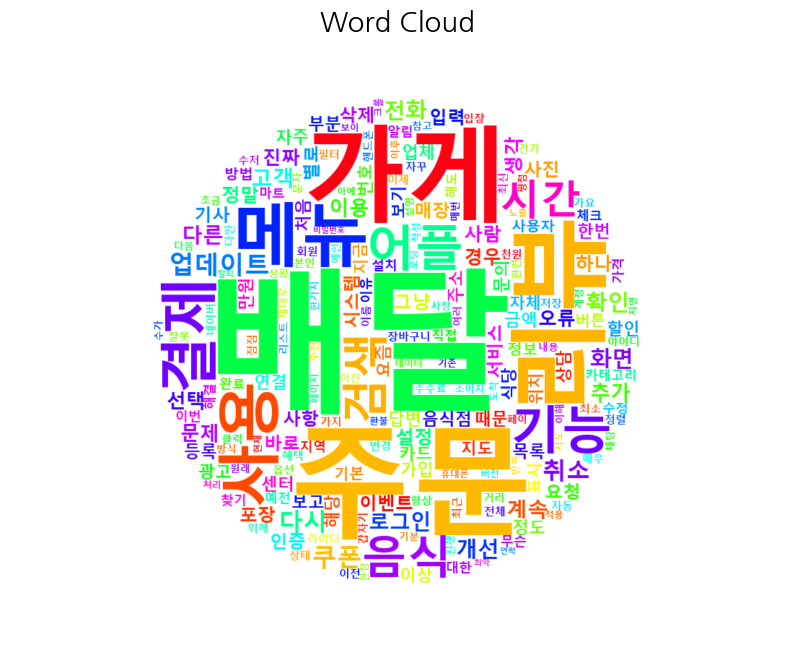

In [146]:
# Counter

count_nouns = collections.Counter(word_list)

print(count_nouns)
print(count_nouns.most_common(30))

# WC

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_rainbow_r',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_nouns)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("Word Cloud", fontsize = 20)
plt.show()
    

## 4. 긍부정 분석

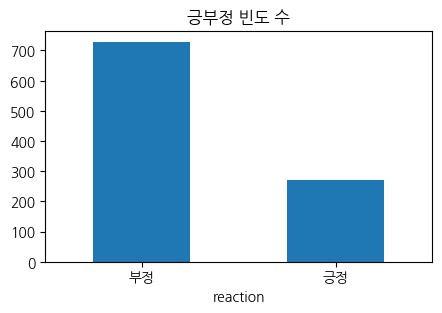

In [147]:
app_review_data["reaction"] = np.where(app_review_data["score"] >= 4, 1, 0)

plt.figure(figsize = (5, 3))
app_review_data["reaction"].value_counts().plot(kind="bar")
plt.title("긍부정 빈도 수")
plt.xticks(ticks = [0, 1], labels = ["부정", "긍정"], rotation = 0)
plt.show()

app_review_data.to_csv("data/appreply3.csv")

In [148]:
# Classic

positive_word_list = []
negative_word_list = []
stopwords = ["배민", "민족", "배달의민족"]

for i, review in enumerate(app_review_data.values.tolist()) :
    re_review = re.sub("[^가-힇a-zA-Z\s]", "", review[0])
    result = okt.nouns(re_review)

    if review[1] >= 3 :
        for res in result :
            if (len(res) >= 2) & (res not in stopwords) :
                positive_word_list.append(res)
    
    else :
        for res in result :
            if (len(res) >= 2) & (res not in stopwords) :
                negative_word_list.append(res)
print(positive_word_list)
print(negative_word_list)

<>:8: DeprecationWarning: invalid escape sequence '\s'
<>:8: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\2014233595.py:8: DeprecationWarning: invalid escape sequence '\s'
  re_review = re.sub("[^가-힇a-zA-Z\s]", "", review[0])


['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '최근', '업데이트', '안드로이드', '사양', '정도', '어플', '실행', '업데이트', '하라', '업데이트', '업데이트', '진행', '열기', '열기', '업데이트', '무한', '반복', '삭제', '설치', '환경설정', '증상', '다른', '증상', '이번', '업데이트', '관련', '파일', '확인', '참고', '사양', '핸드폰', '사양', '문제', '이번', '업데이트', '실행', '로그인', '여부', '먼저', '비회', '이용', '선택', '경우', '나중', '입력', '선택', '주문', '결제', '주소', '설정', '순서', '변경', '어플', '설치', '삭제', '설치', '자주', '다시', '사용', '설치', '실행', '회원정보', '주소', '저장', '어플', '실행', '로그인', '여부', '주소', '다시', '설정', '처음', '주소', '설정', '주문', '어차피', '로그', '시간', '매번', '추가', '드네', '어플', '사용', '사람', '혹시', '굳이', '주문', '상태', '주소', '설정', '이유', '수정', '사항', '라면', '그냥', '어플', '삭제', '사용', '순서', '정도', '라면', '사용자', 

In [149]:
def get_word_list(data : pd.core.frame.DataFrame, stopwords : list) -> list :
    def_word_list = []

    for i, review in enumerate(data["text"].tolist()) :
        re_sub_review = re.sub("[^가-힇a-zA-Z\s]", "", review)
        result = okt.nouns(re_sub_review)

        for res in result :
            if (len(res) >= 2) & (res not in stopwords) :
                def_word_list.append(res)

    return def_word_list

positive_data = app_review_data.loc[app_review_data["reaction"] == 1, :]
negative_data = app_review_data.loc[app_review_data["reaction"] == 0, :]

stopwords = ["배민", "민족", "배달의민족"]

positive_word_list = get_word_list(positive_data, stopwords)
negative_word_list = get_word_list(negative_data, stopwords)

print(positive_word_list)
print(negative_word_list)

<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\2020854103.py:5: DeprecationWarning: invalid escape sequence '\s'
  re_sub_review = re.sub("[^가-힇a-zA-Z\s]", "", review)


['배달', '주문', '리뷰', '자주', '참고', '편입', '한가지', '건의', '사항', '최신', '점순', '주문', '자하', '메뉴', '메뉴', '리뷰', '확인', '기능', '메뉴', '검색', '기능', '리뷰', '특정', '메뉴', '검색', '기능', '주문', '수가', '메뉴', '리뷰', '보기', '위해', '래그', '시간', '소요', '효율', '발생', '긍정', '검토', '주심', '주문', '과거', '목록', '검색', '기능', '분명', '가게', '기억', '찾기', '메뉴', '검색', '곱창', '치면', '과거', '곱창', '목록', '가게', '리뷰', '리뷰', '보기', '실행', '로그인', '여부', '먼저', '비회', '이용', '선택', '경우', '나중', '입력', '선택', '주문', '결제', '주소', '설정', '순서', '변경', '어플', '설치', '삭제', '설치', '자주', '다시', '사용', '설치', '실행', '회원정보', '주소', '저장', '어플', '실행', '로그인', '여부', '주소', '다시', '설정', '처음', '주소', '설정', '주문', '어차피', '로그', '시간', '매번', '추가', '드네', '어플', '사용', '사람', '혹시', '굳이', '주문', '상태', '주소', '설정', '이유', '수정', '사항', '라면', '그냥', '어플', '삭제', '사용', '순서', '정도', '라면', '사용자', '로서', '굳이', '주소', '설정', '필요', '의견', '이용', '사용자', '가지', '건의', '사항', '리뷰', '대신', '방문', '표시', '방문', '표시', '생각', '혹시', '건의', '사항', '다시', '정말', '정말', '결제', '수단', '현장', '결제', '아예', '코로나', '때문', '비대', '권장', '이제', '마스크', '착용', '필수', '추세',

<>:9: DeprecationWarning: invalid escape sequence '\W'
<>:9: DeprecationWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\3973989168.py:9: DeprecationWarning: invalid escape sequence '\W'
  font_path = "C:\Windows\Fonts\malgunbd.ttf",
c:\WorkSpace\myproject\.venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


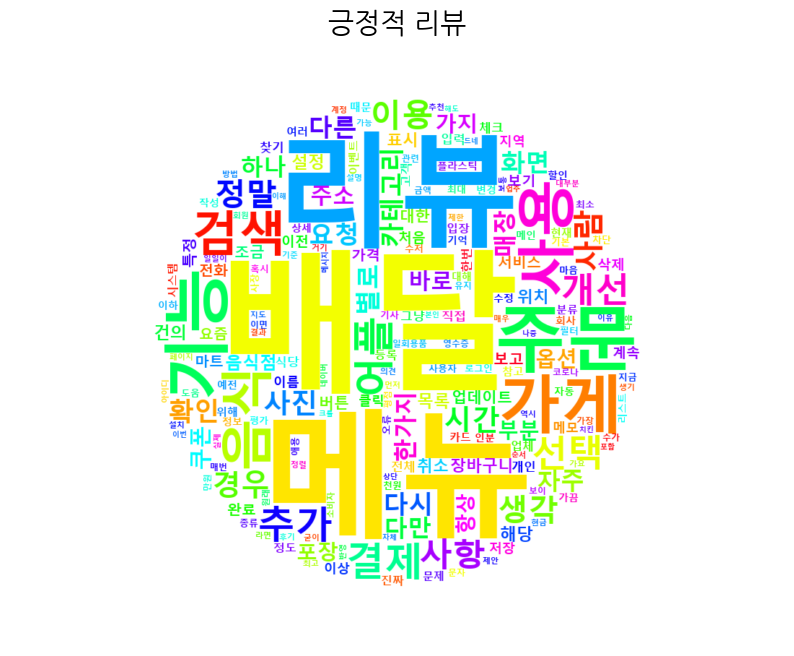

c:\WorkSpace\myproject\.venv\lib\site-packages\matplotlib\cbook.py:684: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  x = np.array(x, subok=True, copy=copy)


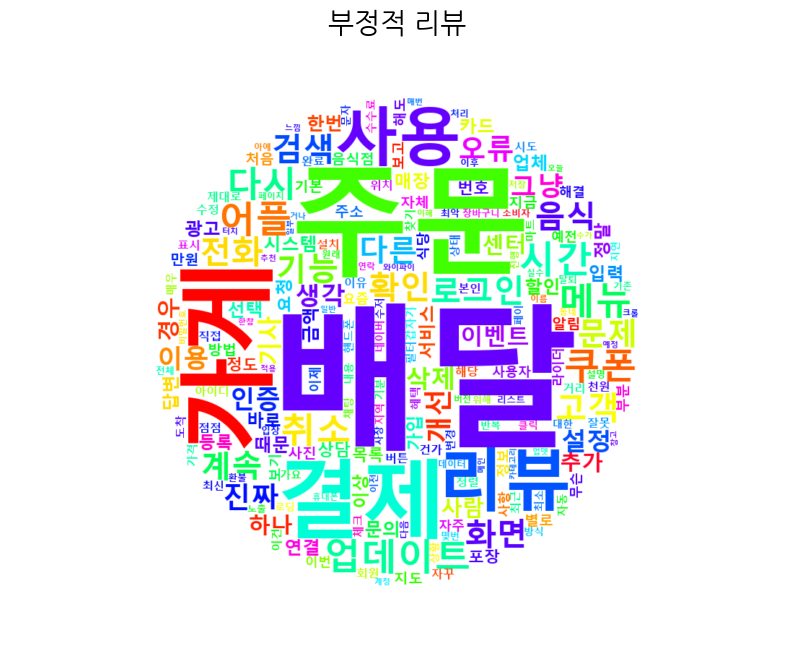

In [150]:
# Counter

count_pos_nouns = collections.Counter(positive_word_list)
count_neg_nouns = collections.Counter(negative_word_list)

# WC

wc = WordCloud(
    font_path = "C:\Windows\Fonts\malgunbd.ttf",
    mask = mask_img,
    background_color = 'white',
    colormap = 'gist_rainbow_r',
    width = 800,
    height = 400
)

wc.generate_from_frequencies(count_pos_nouns)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("긍정적 리뷰", fontsize = 20)
plt.show()

wc.generate_from_frequencies(count_neg_nouns)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.title("부정적 리뷰", fontsize = 20)
plt.show()

## 5. 장바구니 분석

In [151]:
shop_back_data = pd.read_csv("data/appreply2.csv", index_col = 0)
print(shop_back_data.head(10))

                                                text  score
0  배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...      4
1  내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...      5
2  검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...      1
3  배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...      2
4  최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...      3
5  찜매장 구분 좀 해주세요! 대체 언제쯤이면 개선될까요?? 독점이라 해이한건가요? 유...      2
6  앱 실행시에 로그인 여부를 먼저 물어보고 비회원 이용을 선택할 경우, 혹은 나중에 ...      5
7  음식배달 후 시간이 지나면 리뷰를 요청하는 알림이 상단에 뜹니다. 리뷰를 적기위해 ...      3
8  식사 한번에 최소 15000원 이상 주문, 거기에 배달료 3000기본이면 누가 시킵...      1
9  안 먹고 싶은 곳이나 먹고 난 후 만족하지 못한 곳을 차단할 수 있는 옵션이 생기면...      3


In [152]:
main_list = []

for i, review in enumerate(shop_back_data["text"].tolist()):
    # 조건 1. 정규표현식을 이용한 전처리
    new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)
    # 형태소 분석기에 넣기
    result = okt.pos(new_review)
    sub_list = []
    for word, pos in result:
        if pos == "Noun" and len(word) > 1:
            sub_list.append(word)
    main_list.append(sub_list)

    print(f"{i}번째 리뷰: {result}")


<>:5: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_26396\2023763325.py:5: DeprecationWarning: invalid escape sequence '\s'
  new_review = re.sub("[^0-9a-zA-Z가-힣\s]", "", review)


0번째 리뷰: [('배달', 'Noun'), ('의', 'Josa'), ('민족', 'Noun'), ('주문', 'Noun'), ('시', 'Noun'), ('리뷰', 'Noun'), ('를', 'Josa'), ('자주', 'Noun'), ('참고', 'Noun'), ('하는', 'Verb'), ('편입', 'Noun'), ('니', 'Noun'), ('다', 'Josa'), ('한가지', 'Noun'), ('건의', 'Noun'), ('사항', 'Noun'), ('이', 'Josa'), ('있다면', 'Adjective'), ('최신', 'Noun'), ('순', 'Modifier'), ('별', 'Modifier'), ('점순', 'Noun'), ('뿐', 'Noun'), ('만', 'Josa'), ('아니라', 'Adjective'), ('제', 'Noun'), ('가', 'Josa'), ('주문', 'Noun'), ('하고', 'Verb'), ('자하', 'Noun'), ('는', 'Josa'), ('메뉴', 'Noun'), ('를', 'Josa'), ('특정해서', 'Adjective'), ('그', 'Noun'), ('메뉴', 'Noun'), ('의', 'Josa'), ('리뷰', 'Noun'), ('만', 'Josa'), ('확인', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있는', 'Adjective'), ('기능', 'Noun'), ('이', 'Josa'), ('있으면', 'Adjective'), ('좋을', 'Adjective'), ('것', 'Noun'), ('같습니다', 'Adjective'), ('메뉴', 'Noun'), ('검색', 'Noun'), ('기능', 'Noun'), ('처럼', 'Josa'), ('리뷰', 'Noun'), ('에서도', 'Josa'), ('특정', 'Noun'), ('메뉴', 'Noun'), ('검색', 'Noun'), ('기능', 'Noun'), ('이', 'Josa'), (

In [153]:
te = TransactionEncoder()
te_arr = te.fit(main_list).transform(main_list)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,가게,가격,가계,가공,가관,가구,가기,가까스로,가까윤,가까이,...,휴대전화,휴대폰,휴대폰결제,휴먼,휴면,휴업,흐릿,희망,흰색,히어로
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
996,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
frequent_itemsets = apriori(df, min_support = 0.05, use_colnames = True, max_len = 2)
frequent_itemsets

,support,itemsets
0,0.208,(가게)
1,0.102,(개선)
2,0.111,(검색)
3,0.115,(결제)
4,0.076,(경우)
...,...,...
81,0.052,"(주문, 시간)"
82,0.050,"(주문, 어플)"
83,0.057,"(주문, 음식)"
84,0.061,"(전화, 주문)"


In [155]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=1.0)
print(rules)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [156]:
rules["antecedents_str"] = rules["antecedents"].apply(lambda x: ",".join(sorted(list(x))))
rules["consequents_str"] = rules["consequents"].apply(lambda x: ",".join(sorted(list(x))))

rules[["antecedents_str", "consequents_str", "support", "confidence", "lift"]]

,antecedents_str,consequents_str,support,confidence,lift


In [157]:
pivot_data = rules.pivot_table(
    index="antecedents_str",
    columns="consequents_str",
    values="lift",
    fill_value=0
)
pivot_data

consequents_str
antecedents_str


In [159]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot_data, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.3, square=True)
plt.title("연관성 분석 시각화(Lift 기준)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x1000 with 0 Axes>

## 6. 네트워크 분석

In [160]:
import networkx as nx
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [161]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=1.0)
print(rules)

# 1. 그래프 생성
G = nx.Graph()

# 2. 엣지 추가
for _, row in rules.iterrows() :
    # 단어 추출
    antecedent = ",".join(row["antecedent"])
    consequent = ",".join(row["consequent"])
    weight = row["confidence"]

    # 노드 추가
    G.add_edge(antecedent, consequent, weight = weight)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


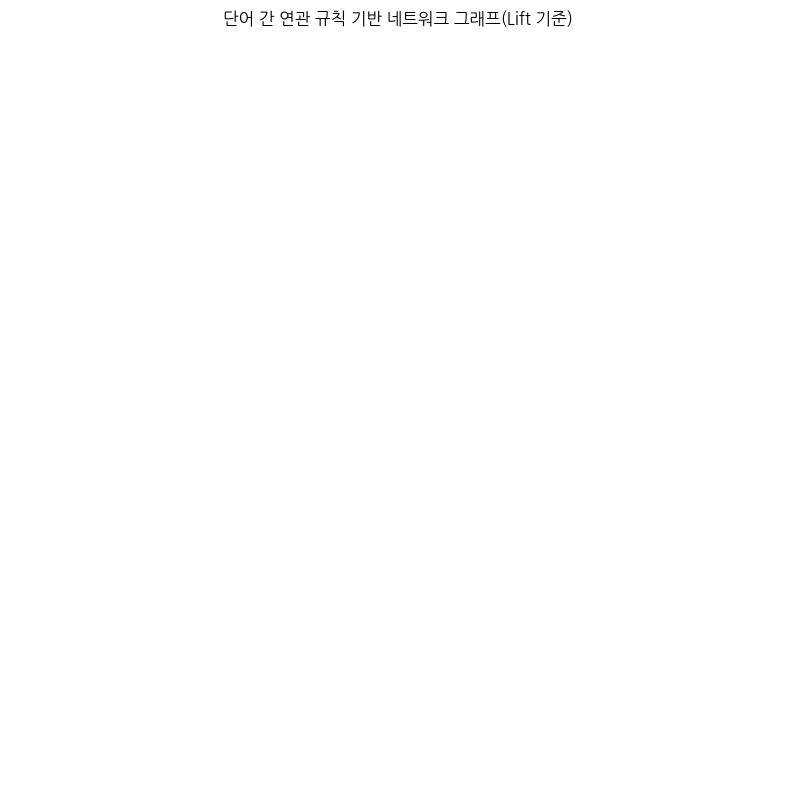

In [ ]:
# 3. 노드 배치
pos = nx.kamada_kawai_layout(G)

# 4. 가중치 추출
edge_weights = [G[u][v]["weight"] for u, v in G.edges()]

# 5. 노드 스타일 지정 및 그리기
plt.figure(figsize = (10, 10))
nx.draw_networkx_nodes(G, pos, node_color = "lightblue", node_size = 1000)
nx.draw_networkx_edges(G, pos, edge_color = "gray", width = edge_weights)
nx.draw_networkx_labels(G, pos, font_size = 12, font_family = "Malgun Gothic")

# edge_labes = {(u, v) : f"{d['weight'] : .2f}" for u, v, d in G.edges(data = True)}
# nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 8)

plt.title("단어 간 연관 규칙 기반 네트워크 그래프(Lift 기준)")
plt.axis("off")
plt.show()

## 7. 인코딩 / 벡터라이징

In [163]:
from sklearn.preprocessing import LabelEncoder

### 1) 인코딩

In [164]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다"
]

#### 정수 인코딩

In [167]:
# sentences 를 스페이스 기준으로 쪼갠다.
# 그 단어들의 집합을 만든다.

tokens = []
for sent in sentences :
    temp = sent.split()
    tokens.extend(temp)

print(tokens)
token_set = set(tokens)
print(token_set)

['나는', '오늘', '기분이', '좋다', '오늘', '날씨가', '좋다', '나는', '기분이', '나쁘다']
{'좋다', '기분이', '오늘', '나는', '날씨가', '나쁘다'}


In [169]:
label_encoder = LabelEncoder()
encoded = label_encoder.fit_transform(list(token_set))
print(encoded)
print(label_encoder.classes_)

[5 0 4 1 3 2]
['기분이' '나는' '나쁘다' '날씨가' '오늘' '좋다']


In [171]:
my_dict = {}

for key, value in zip(encoded, label_encoder.classes_) :
    my_dict[int(key)] = str(value)
print(my_dict)

{5: '기분이', 0: '나는', 4: '나쁘다', 1: '날씨가', 3: '오늘', 2: '좋다'}


#### 원-핫 인코딩

In [172]:
from sklearn.preprocessing import OneHotEncoder

In [175]:
tokens_numpy = np.array(list(token_set))
print(tokens_numpy)

tokens_arr = tokens_numpy.reshape(-1, 1)
print(tokens_arr)

oh_encoder = OneHotEncoder()
encoded = oh_encoder.fit_transform(tokens_arr)
print(encoded.toarray())

['좋다' '기분이' '오늘' '나는' '날씨가' '나쁘다']
[['좋다']
 ['기분이']
 ['오늘']
 ['나는']
 ['날씨가']
 ['나쁘다']]
[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [176]:
oh_encoder.categories_

[array(['기분이', '나는', '나쁘다', '날씨가', '오늘', '좋다'], dtype='<U3')]

### 2) 벡터 인코딩

#### BoW (Bag of Words)

In [178]:
from sklearn.feature_extraction.text import CountVectorizer

In [181]:
# 미션 : 딕셔너리 만들기 (단어 : 빈도, 형태의 딕셔너리 만들기)

token_dict = {}

for sent in sentences :
    temp = sent.split()
    for t in temp :
        if t in token_dict.keys() :
            token_dict[t] += 1
        else :
            token_dict[t] = 1

print(token_dict)

{'나는': 2, '오늘': 2, '기분이': 2, '좋다': 2, '날씨가': 1, '나쁘다': 1}


In [179]:
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(bow_matrix.toarray())

{'나는': 1, '오늘': 4, '기분이': 0, '좋다': 5, '날씨가': 3, '나쁘다': 2}
[[1 1 0 0 1 1]
 [0 0 0 1 1 1]
 [1 1 1 0 0 0]]


#### TF-IDF

In [185]:
sentences = [
    "나는 오늘 기분이 좋다",
    "오늘 날씨가 좋다",
    "나는 기분이 나쁘다",
    "집에 가고 싶다"
]

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [187]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)
print(vectorizer.vocabulary_)
print(tfidf_matrix.toarray())

{'나는': 2, '오늘': 6, '기분이': 1, '좋다': 7, '날씨가': 4, '나쁘다': 3, '집에': 8, '가고': 0, '싶다': 5}
[[0.         0.5        0.5        0.         0.         0.
  0.5        0.5        0.        ]
 [0.         0.         0.         0.         0.66767854 0.
  0.52640543 0.52640543 0.        ]
 [0.         0.52640543 0.52640543 0.66767854 0.         0.
  0.         0.         0.        ]
 [0.57735027 0.         0.         0.         0.         0.57735027
  0.         0.         0.57735027]]


#### 유사도 분석

In [188]:
from sklearn.metrics.pairwise import cosine_similarity

In [189]:
similarity = cosine_similarity(tfidf_matrix)
print(similarity)

[[1.         0.52640543 0.52640543 0.        ]
 [0.52640543 1.         0.         0.        ]
 [0.52640543 0.         1.         0.        ]
 [0.         0.         0.         1.        ]]
